# Data Set up

In [ ]:
# Uncomment and run the following lines if you need to install any packages
# !pip install pandas numpy scikit-learn matplotlib seaborn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, classification_report)
import joblib

In [ ]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Columns with 'Yes'/'No' values
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Map 'Yes' to 1 and 'No' to 0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode 'gender' column
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Columns to One-Hot Encode
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# Perform One-Hot Encoding
df = pd.get_dummies(df, columns=multi_cat_cols)

# Columns to scale
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Drop 'customerID' as it's not useful for modeling
df.drop(['customerID'], axis=1, inplace=True)

# Define X (features) and y (target)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Save the list of columns after preprocessing
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Log Regression

Logistic Regression Accuracy: 0.7874911158493249
Logistic Regression Precision: 0.6213592233009708
Logistic Regression Recall: 0.5133689839572193


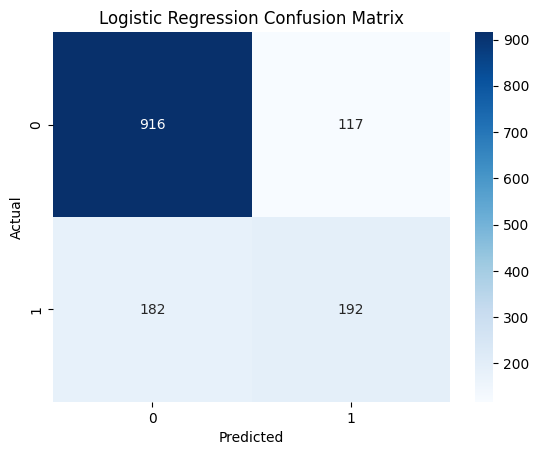

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Accuracy
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))

# Precision
print('Logistic Regression Precision:', precision_score(y_test, y_pred_lr))

# Recall
print('Logistic Regression Recall:', recall_score(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Random Forest

Random Forest Accuracy: 0.7867803837953091
Random Forest Precision: 0.6258503401360545
Random Forest Recall: 0.4919786096256685


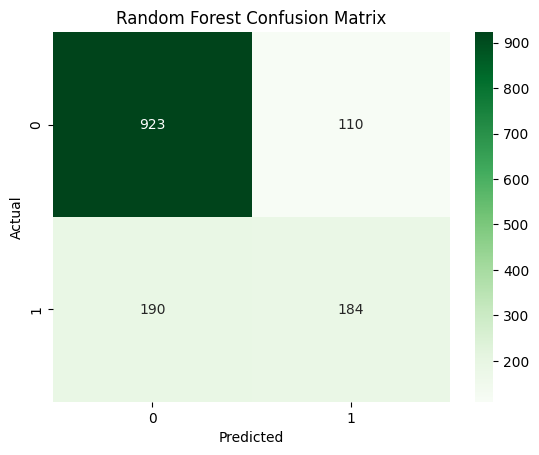

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

# Precision
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))

# Recall
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Parameter Tuning

In [ ]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print('Best Parameters:', grid_search.best_params_)

# Use the best estimator
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


Tuned Random Forest Accuracy: 0.7910447761194029
Tuned Random Forest Precision: 0.6408450704225352
Tuned Random Forest Recall: 0.48663101604278075


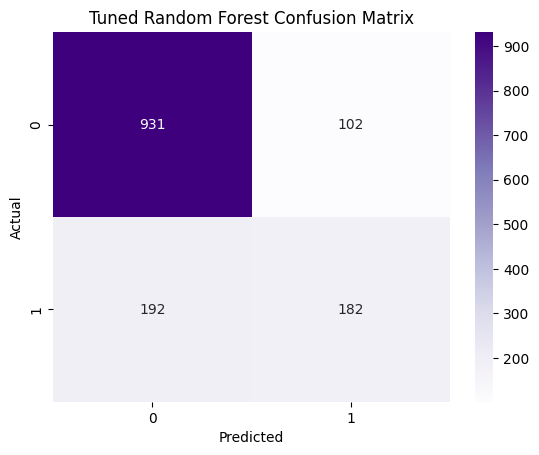

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [ ]:
# Accuracy
print('Tuned Random Forest Accuracy:', accuracy_score(y_test, y_pred_best_rf))

# Precision
print('Tuned Random Forest Precision:', precision_score(y_test, y_pred_best_rf))

# Recall
print('Tuned Random Forest Recall:', recall_score(y_test, y_pred_best_rf))

# Confusion Matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_best_rf, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred_best_rf))

In [ ]:
# Save the trained model
joblib.dump(best_rf_model, 'best_rf_model.pkl')

['best_rf_model.pkl']

# Feature Analysis

<ipython-input-25-70efdf2b3b21>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


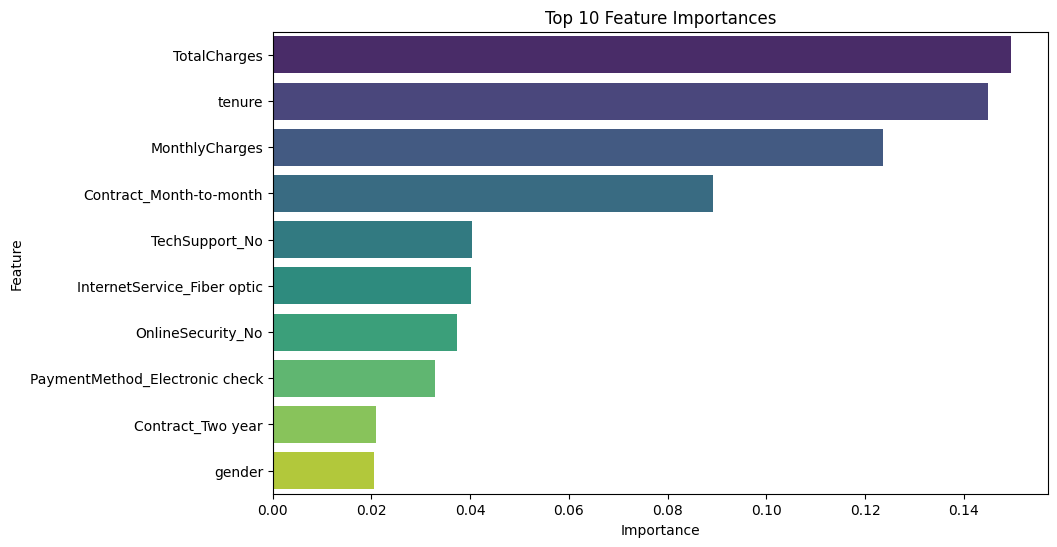

In [ ]:
# Get feature importances
importances = best_rf_model.feature_importances_

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort by importance
feat_imp_df = feat_imp_df.sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances')
plt.show()

# SHAP Analysis

In [ ]:
# Identify boolean columns
bool_cols = X_train.select_dtypes(include=['bool']).columns.tolist()

# Convert boolean columns to int in both X_train and X_test
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Fill any missing values with zero
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Ensure X_test has the same columns and order as X_train
X_test = X_test[X_train.columns]

# Check data types
#print("Data types in X_train:")
#print(X_train.dtypes)

# Verify shapes
#print("Shape of shap_values.values:", shap_values.values.shape)
#print("Shape of X_test:", X_test.shape)

In [ ]:
!pip install shap

# Import SHAP
import shap

# Initialize the explainer with your model and training data
explainer = shap.Explainer(best_rf_model, X_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.6 MB/s eta 0:00:00


In [ ]:
# Calculate SHAP values for the test set
shap_values = explainer(X_test, check_additivity=False)

100%|===================| 2811/2814 [06:17<00:00]       

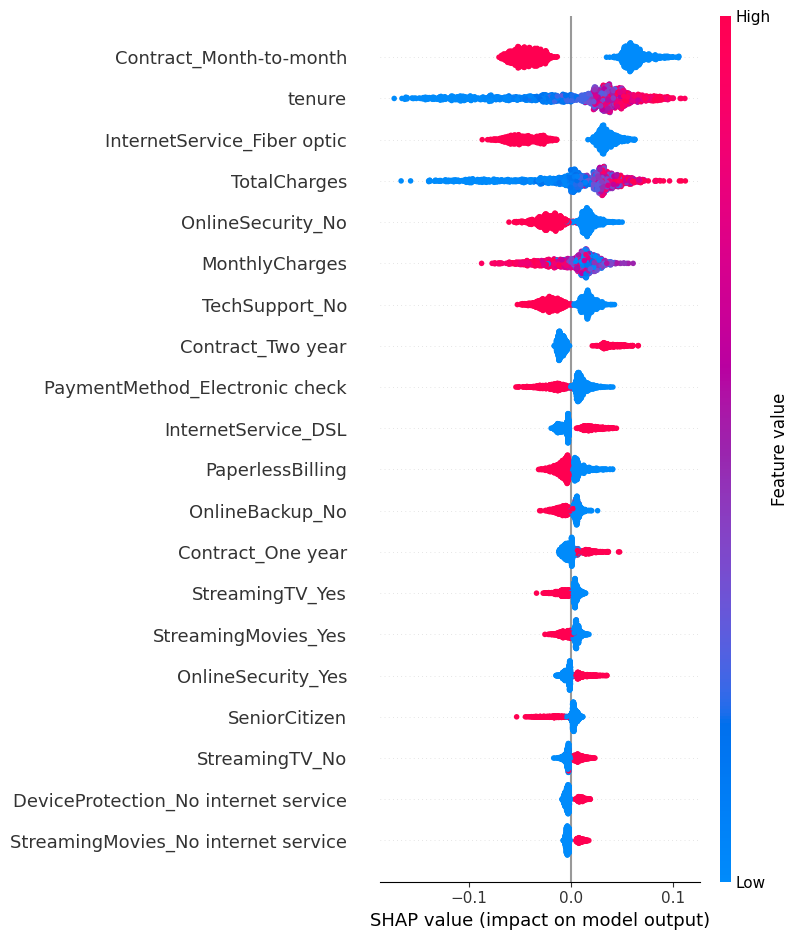

In [ ]:
shap.summary_plot(shap_values[..., 0], X_test, feature_names=X_test.columns) # SHAP values for no churn "0"

# Neural Network


In [ ]:
# Install TensorFlow if not already installed
# !pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=64,
                       validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print('Neural Network Accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6609 - loss: 0.5739 - val_accuracy: 0.7839 - val_loss: 0.4474
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7954 - loss: 0.4257 - val_accuracy: 0.7818 - val_loss: 0.4391
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8145 - loss: 0.4067 - val_accuracy: 0.7839 - val_loss: 0.4344
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4055 - val_accuracy: 0.7946 - val_loss: 0.4360
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4045 - val_accuracy: 0.7939 - val_loss: 0.4353
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8121 - loss: 0.4095 - val_accuracy: 0.7932 - val_loss: 0.4317
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4109 - val_accuracy: 0.7967 - val_loss: 0.4360
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8155 - loss: 0.3979 - val_accuracy: 0.7918 - val_loss:

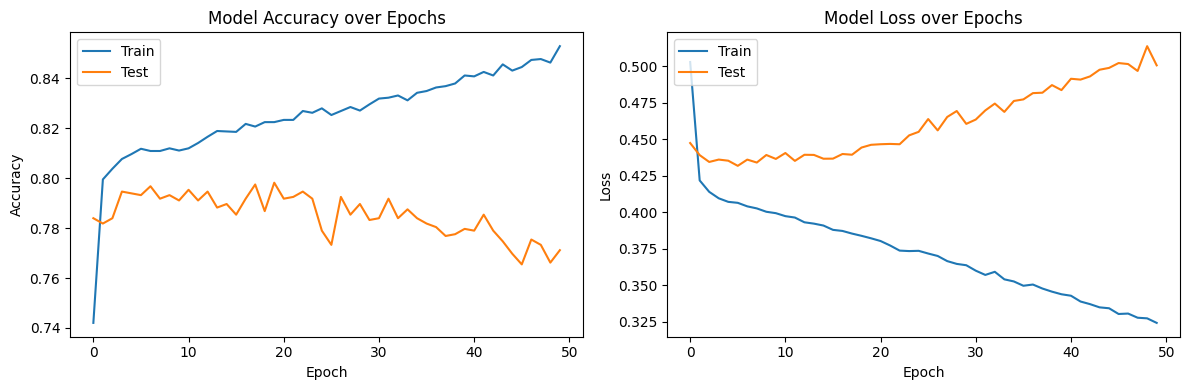

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()